In [1]:
from functools import partial

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dvu
import viz

plt.style.use('default')
dvu.set_style()
# df = pd.read_csv('data/cdis_with_schemas.csv')
df = pd.read_pickle('../data/cdis_with_schemas.pkl')

In [2]:
df.head()

,medium_description_en,url,full_title_en,expert_name,short_title_en,short_description_en,disease_en,system_en,search_abbreviation_en,purpose_en,...,input_schema,content,cmeReleaseDate,dosing,seo,md5,related_calcs,created_at,updated_at,num_rules
0,Diagnoses delirium in older patients.,4-test-delirium-assessment,4 A’s Test for Delirium Screening,[],4AT,Delirium screening.,"[Delirium, Dementia]","[Neurologic, Psychiatric]","[4at, 4 As Test, 4as test, delirium screening,...",[Diagnosis],...,"[{'optional': False, 'default': 0, 'show_point...","{'reviewer': {'expert_name': []}, 'related_res...",None,False,{'meta_description_en': 'The 4 A’s Test for De...,24ae261c87f41784ca0beae2147dda0a,"[{'calcId': 3995, 'short_title_en': 'AMT-4', '...",NaN,NaN,4.0
1,Rules out PE based on clinical criteria.,4-level-pulmonary-embolism-clinical-probabilit...,4-Level Pulmonary Embolism Clinical Probabilit...,[],4PEPS Score for PE,Rules out PE.,"[Deep Venous Thrombosis, Pulmonary Embolism]","[Cardiac, Respiratory]",[4-Level Pulmonary Embolism Clinical Probabili...,"[Diagnosis, Rule Out]",...,"[{'label_en': 'Age', 'conditionality': '', 'de...",{'how_to_use': {'use_case_en': '<p>Do you use ...,None,False,{'meta_description_en': 'The 4-Level Pulmonary...,,"[{'calcId': 1750, 'short_title_en': 'Geneva Sc...",NaN,NaN,12.0
2,Predicts in-hospital mortality in patients adm...,4c-mortality-score-covid-19,4C Mortality Score for COVID-19,"[Miguel Reyes, MD , Arsalan Shawl, DO]",4C Mortality Score for COVID-19,In-hospital COVID-19 mortality.,"[COVID-19, Coronavirus]",[Respiratory],"[4C Mortality Score for COVID-19, 4C, 4C morta...",[Prognosis],...,"[{'type': 'radio', 'label_en': 'Age, years ', ...",{'how_to_use': {'use_case_en': '<p>Apply to ri...,None,False,{'meta_description_en': 'The 4C Mortality Scor...,,"[{'calcId': 10279, 'short_title_en': 'MuLBSTA ...",NaN,NaN,10.0
3,Differentiates patients with HIT from those wi...,4ts-score-heparin-induced-thrombocytopenia,4Ts Score for Heparin-Induced Thrombocytopenia,"[Calvin Hwang, MD]",4Ts for HIT,HIT vs other causes of thrombocytopenia.,"[Bleeding/Hemorrhage, Thrombocytopenia]",[Hematologic],"[plt, HIT]",[Diagnosis],...,"[{'default': 2, 'label_en': 'Thrombocytopenia'...","{'about': {'evidence_based_medicine_en': '', '...",NaN,False,{'meta_description_en': 'The 4Ts Score is a cl...,0483d560043c355df74af2ff2c3337b7,"[{'calcId': 1789, 'short_title_en': 'HIT Exper...",NaN,NaN,4.0
4,Calculates reference values for distance walke...,6-minute-walk-distance,6 Minute Walk Distance,[],6 Minute Walk Distance,Functional status.,"[CHF, Chronic Pain, Congestive Heart Failure, ...",[Any/All],"[6MWD, walking, six minute, functional status]",[Formula],...,"[{'type': 'toggle', 'label_en': 'Sex', 'name':...","{'how_to_use': {'use_case_en': '', 'pearls_pit...",NaN,False,{'meta_description_en': 'The 6 Minute Walk Dis...,9e1022e778dabfcc554ce1042961b6b2,"[{'calcId': 10161, 'short_title_en': 'COPD Ass...",NaN,NaN,5.0


# rule counts

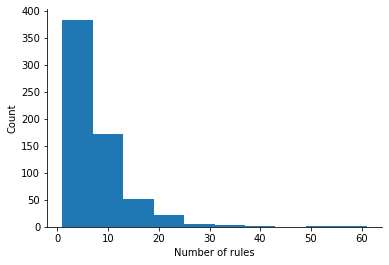

In [3]:
# plt.figure(dpi=300, facecolor='w')
plt.hist(df['num_rules'])
plt.xlabel('Number of rules')
plt.ylabel('Count')
viz.savefig('num_rules_hist')
# plt.show()

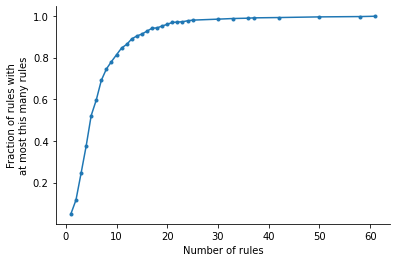

In [9]:
vals, counts = np.unique(df['num_rules'], return_counts=True)
plt.plot(vals, np.cumsum(counts) / np.sum(counts), '.-')
plt.xlabel('Number of rules')
plt.ylabel('Fraction of rules with\nat most this many rules')
plt.show()

In [11]:
print('cdf values at 20 and 16', np.mean((df['num_rules'] <= 20)), np.mean((df['num_rules'] <= 16)))

cdf values at 20 and 16 0.9596273291925466 0.9270186335403726


# metadata

In [27]:
METADATA_COLS = ['disease_en', 'system_en', 'purpose_en', 'chief_complaint_en', 'specialty_en']  # these are list-valued
METADATA_DICT = {
    'disease_en': 'addressing this disease',
    'system_en': 'addressing this system',
    'purpose_en': 'with this purpose',
    'chief_complaint_en': 'addressing this chief complaint',
    'specialty_en': 'with this specialty',
}

for col in METADATA_COLS:
    all_vals = sum(df[col], [])
    all_vals = [x for x in all_vals if x] # remove empty strings
    val_counts = pd.Series(all_vals).value_counts()

    plt.figure(figsize=(10, 12), dpi=300, facecolor='w')
    N = 60
    # plt.grid()
    ax = sns.barplot(y=val_counts.index[:N],
                     x=val_counts.values[:N], orient='h')
    ax.bar_label(ax.containers[0])

    plt.xlabel(f'Number of CDIs {METADATA_DICT[col]}\n(Out of {df.shape[0]} CDIs)')
    plt.tight_layout()
    viz.savefig(col)
    plt.close()